<a href="https://colab.research.google.com/github/chiusanghung/Stock-Prediction/blob/main/VIC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Load_data
df_link = '/content/drive/MyDrive/Dataset/VIC.csv'

df = pd.read_csv(df_link, index_col='Date/Time', parse_dates=True)

In [4]:
#Take data
df1=pd.DataFrame(df,columns=('Date/Time','Close'))
df1.drop("Date/Time",axis=1,inplace=True)

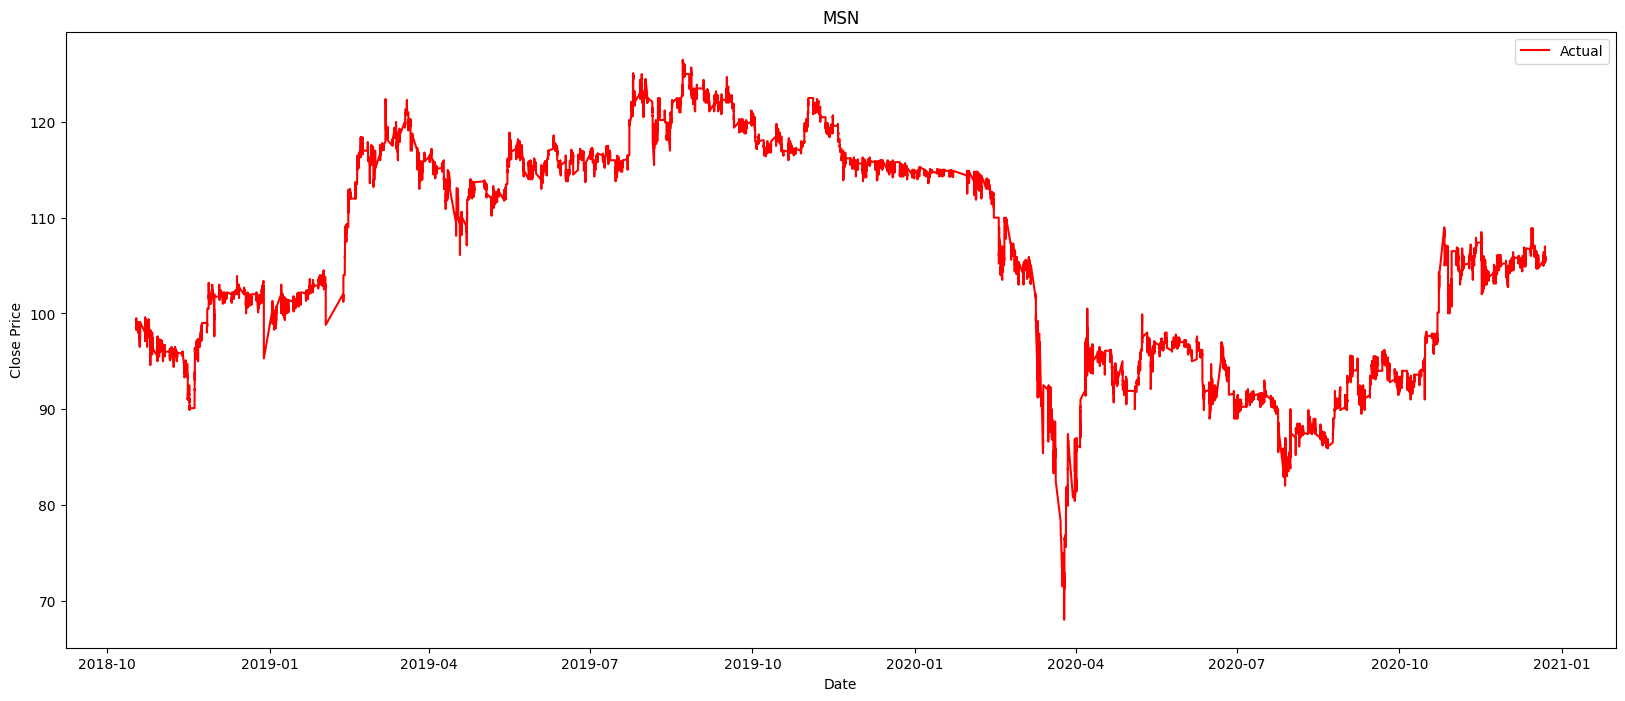

In [5]:
plt.figure(figsize=(20,8))
plt.plot(df1['Close'], label='Actual', color='red')
plt.title('MSN')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [6]:
df1

,Close
Date/Time,
2018-10-17 09:39:00,98.5
2018-10-17 09:40:00,98.5
2018-10-17 09:41:00,98.6
2018-10-17 09:42:00,98.6
2018-10-17 09:43:00,98.7
...,...
2020-12-22 14:22:00,105.7
2020-12-22 14:23:00,105.7
2020-12-22 14:24:00,105.7


In [8]:
data = df1.values
train_data = data[:80000]
test_data = data[80000:]
data

array([[ 98.5],
       [ 98.5],
       [ 98.6],
       ...,
       [105.7],
       [105.7],
       [105.7]])

In [9]:
sc = MinMaxScaler(feature_range = (0,1))
sc_train = sc.fit_transform(data)

In [10]:
x_train, y_train = [],[]
for i in range(50, len(train_data)):
  x_train.append(sc_train[i-50:i, 0])
  y_train.append(sc_train[i, 0])

#1 mang
x_train = np.array(x_train)
y_train = np.array(y_train)

#1 chieu
x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0], 1))

In [11]:
model = Sequential()
model.add(LSTM(units = 128, input_shape=(x_train.shape[1], 1), return_sequences = True))
model.add(LSTM(units = 64))
model.add(Dropout(0.5))
model.add(Dense(1))
model.compile(loss='mean_absolute_error', optimizer='adam')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 128)           66560     
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 116033 (453.25 KB)
Trainable params: 116033 (453.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
save_model='VIC.hdf5'
best_model = ModelCheckpoint(save_model, monitor='loss',verbose=2,save_best_only=True,modee='auto')
model.fit(x_train,y_train,epochs=100, batch_size=50, verbose=2, callbacks=[best_model])

Epoch 1/100

Epoch 1: loss improved from inf to 0.04988, saving model to VIC.hdf5
1599/1599 - 19s - loss: 0.0499 - 19s/epoch - 12ms/step
Epoch 2/100


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: loss improved from 0.04988 to 0.02200, saving model to VIC.hdf5
1599/1599 - 10s - loss: 0.0220 - 10s/epoch - 6ms/step
Epoch 3/100

Epoch 3: loss improved from 0.02200 to 0.01946, saving model to VIC.hdf5
1599/1599 - 11s - loss: 0.0195 - 11s/epoch - 7ms/step
Epoch 4/100

Epoch 4: loss improved from 0.01946 to 0.01883, saving model to VIC.hdf5
1599/1599 - 12s - loss: 0.0188 - 12s/epoch - 7ms/step
Epoch 5/100

Epoch 5: loss improved from 0.01883 to 0.01857, saving model to VIC.hdf5
1599/1599 - 11s - loss: 0.0186 - 11s/epoch - 7ms/step
Epoch 6/100

Epoch 6: loss improved from 0.01857 to 0.01854, saving model to VIC.hdf5
1599/1599 - 12s - loss: 0.0185 - 12s/epoch - 8ms/step
Epoch 7/100

Epoch 7: loss improved from 0.01854 to 0.01835, saving model to VIC.hdf5
1599/1599 - 9s - loss: 0.0183 - 9s/epoch - 6ms/step
Epoch 8/100

Epoch 8: loss improved from 0.01835 to 0.01822, saving model to VIC.hdf5
1599/1599 - 10s - loss: 0.0182 - 10s/epoch - 7ms/step
Epoch 9/100

Epoch 9: loss did not

In [14]:
model.save('/content/drive/MyDrive/Dataset/VIC.h5')

In [15]:
y_train = sc.inverse_transform(y_train)
final_model = load_model('VIC.hdf5')
y_train_predict = final_model.predict(x_train)
y_train_predict = sc.inverse_transform(y_train_predict)

2499/2499 [==============================] - 11s 4ms/step


In [16]:
#Test
test = df1[len(train_data)-50:].values
test = test.reshape(-1,1)
sc_test = sc.transform(test)

x_test=[]
for i in range(50, test.shape[0]):
  x_test.append(sc_test[i-50:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

#data test
y_test = data[80000:]
y_test_predict = final_model.predict(x_test)
y_test_predict = sc.inverse_transform(y_test_predict)

665/665 [==============================] - 2s 4ms/step


<ipython-input-17-a1c077ce389e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data1['Predict'] = y_train_predict #add data
<ipython-input-17-a1c077ce389e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data1['Predict'] = y_test_predict


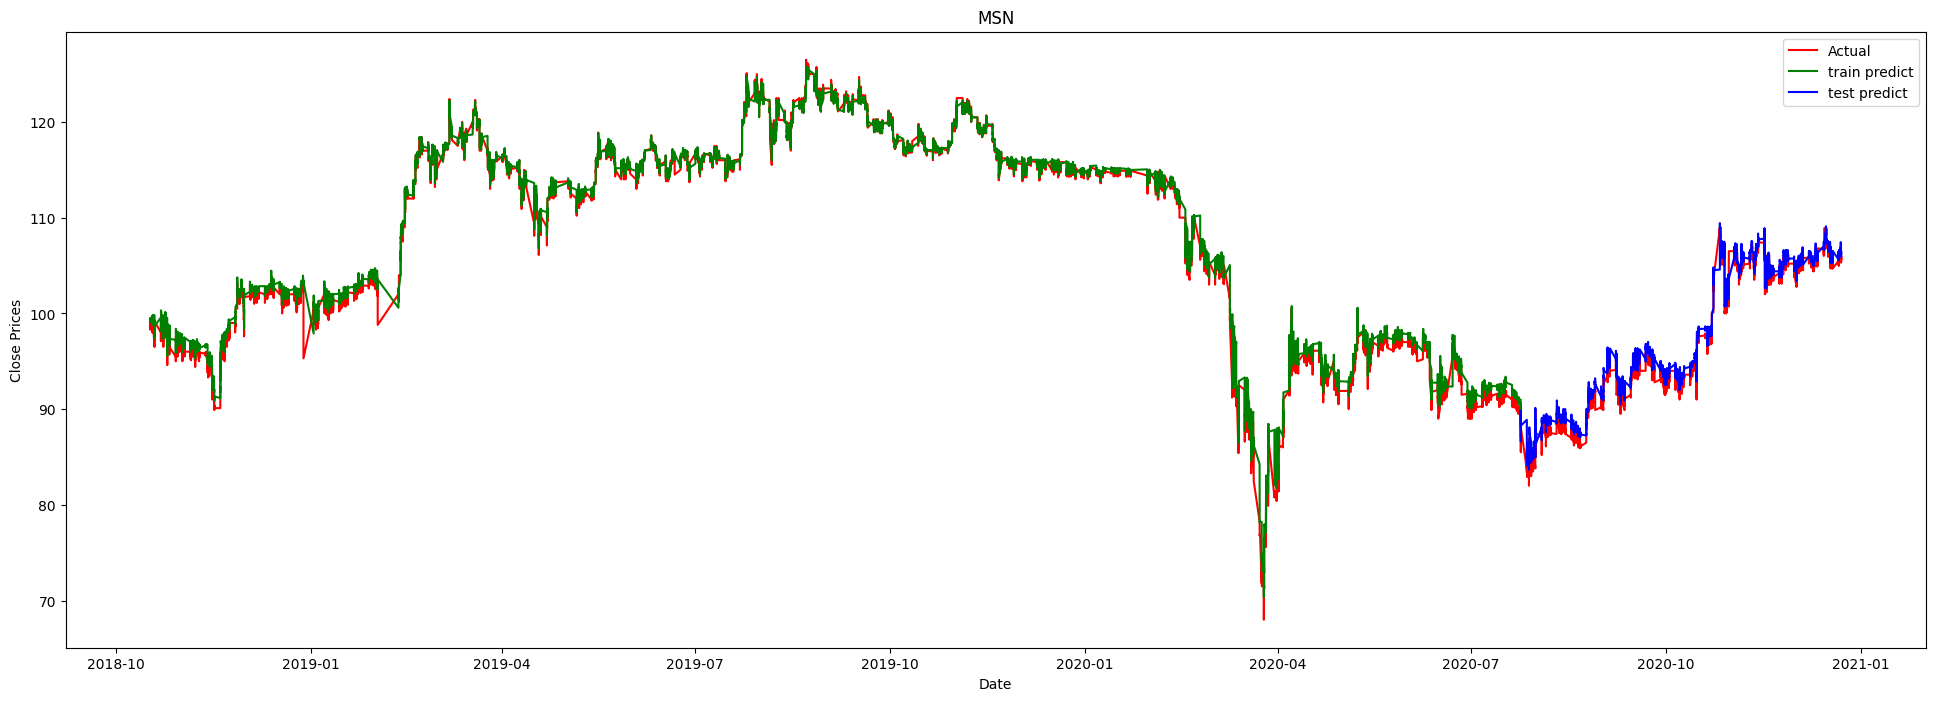

In [17]:
train_data1 = df1[50:80000]
test_data1 = df1[80000:]

plt.figure(figsize=(24,8))
plt.plot(df1,label='Actual',color='red') #line actual
train_data1['Predict'] = y_train_predict #add data
plt.plot(train_data1['Predict'], label='train predict',color='green') #line train predict
test_data1['Predict'] = y_test_predict
plt.plot(test_data1['Predict'], label='test predict',color='blue') #line test predict
plt.title('MSN')
plt.xlabel('Date')
plt.ylabel('Close Prices')
plt.legend()
plt.show()

In [18]:
print('Accuracy Score', r2_score(y_test, y_test_predict))
print('Average absolute error', mean_absolute_error(y_test, y_test_predict))
print('Mean absolute error percentage', mean_absolute_percentage_error(y_test, y_test_predict))

Accuracy Score 0.9872223982981323
Average absolute error 0.7950352046941078
Mean absolute error percentage 0.008422213352612947


In [19]:
print('Accuracy Score', r2_score(y_train, y_train_predict))
print('Average absolute error', mean_absolute_error(y_train, y_train_predict))
print('Mean absolute error percentage', mean_absolute_percentage_error(y_train, y_train_predict))

Accuracy Score 0.9971526733057674
Average absolute error 0.47030654063651206
Mean absolute error percentage 0.00479613982419371


In [20]:
train_data1

,Close,Predict
Date/Time,,
2018-10-17 10:36:00,98.8,99.447105
2018-10-17 10:37:00,98.8,99.519814
2018-10-17 10:40:00,98.6,99.539734
2018-10-17 10:41:00,98.6,99.401169
2018-10-17 10:42:00,98.6,99.364258
...,...,...
2020-07-24 10:44:00,88.7,89.814888
2020-07-24 10:45:00,89.0,89.758507
2020-07-24 10:46:00,89.1,89.971512


In [21]:
test_data1

,Close,Predict
Date/Time,,
2020-07-24 10:49:00,88.4,89.578850
2020-07-24 10:50:00,88.9,89.475601
2020-07-24 10:51:00,88.8,89.830475
2020-07-24 10:52:00,88.5,89.836075
2020-07-24 10:53:00,88.6,89.616425
...,...,...
2020-12-22 14:22:00,105.7,106.323654
2020-12-22 14:23:00,105.7,106.254845
2020-12-22 14:24:00,105.7,106.234375
